# Tesla (TSLA) Stock Price prediction using Prophet

## Importing all the necessary Libraries

In [3]:
!pip install prophet

     ---------------------------------------- 12.9/12.9 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 47.9/47.9 kB 345.7 kB/s eta 0:00:00
     ------------------------------------- 695.7/695.7 kB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 11.4 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=3e6ce2f76598f1b03617d3b8130d766747c9b612b9f66b72e6629cadd2d0135e
  Stored in directory: c:\users\mayjaikaew\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus


In [4]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [6]:
df= pd.read_csv('TSLA.csv')

In [ ]:
#read_csv function from pandas

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-06,23.030666,23.665333,22.788000,22.799334,22.799334,128464500
1,2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
2,2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
3,2018-08-09,24.370001,24.467333,23.048668,23.496668,23.496668,257757000
4,2018-08-10,23.600000,24.000000,23.066668,23.699333,23.699333,173280000
...,...,...,...,...,...,...,...
1253,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
1254,2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
1255,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
1256,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,153.066142,156.590009,149.242997,153.007444,153.007444,1.362702e+08
std,113.282716,115.785988,110.444104,113.120922,113.120922,8.865758e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,23.241667,23.592000,22.937834,23.299667,23.299667,7.911248e+07
50%,168.665001,174.464996,166.529999,169.529999,169.529999,1.091400e+08
75%,244.348332,249.408329,239.289162,244.116669,244.116669,1.648486e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [25]:
# focus on close price
px.area(df, x='Date', y='Close')

In [10]:
px.line(df, x='Date', y='Close')

In [11]:
px.area(df, x='Date', y='Volume')

In [12]:
px.bar(df, y='Volume')

In [13]:
px.box(df, y='Close')

# Using Prophet

## Data Preperation

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-06,23.030666,23.665333,22.788000,22.799334,22.799334,128464500
1,2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
2,2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
3,2018-08-09,24.370001,24.467333,23.048668,23.496668,23.496668,257757000
4,2018-08-10,23.600000,24.000000,23.066668,23.699333,23.699333,173280000
...,...,...,...,...,...,...,...
1253,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
1254,2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
1255,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
1256,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100


In [15]:
columns=['Date','Close']
ndf= pd.DataFrame(df,columns=columns)

In [16]:
ndf

,Date,Close
0,2018-08-06,22.799334
1,2018-08-07,25.304667
2,2018-08-08,24.689333
3,2018-08-09,23.496668
4,2018-08-10,23.699333
...,...,...
1253,2023-07-31,267.429993
1254,2023-08-01,261.070007
1255,2023-08-02,254.110001
1256,2023-08-03,259.320007


In [18]:
prophet_df= ndf.rename(columns={'Date':'ds','Close':'y'})

In [19]:
prophet_df

,ds,y
0,2018-08-06,22.799334
1,2018-08-07,25.304667
2,2018-08-08,24.689333
3,2018-08-09,23.496668
4,2018-08-10,23.699333
...,...,...
1253,2023-07-31,267.429993
1254,2023-08-01,261.070007
1255,2023-08-02,254.110001
1256,2023-08-03,259.320007


## Creating Prophet Model

In [21]:
m=Prophet()
m.fit(prophet_df)

20:18:28 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [22]:
future= m.make_future_dataframe(periods=30)
forecast= m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-06,17.112025,-20.495984,65.201955,17.112025,17.112025,6.208344,6.208344,6.208344,0.054878,0.054878,0.054878,6.153467,6.153467,6.153467,0.0,0.0,0.0,23.320369
1,2018-08-07,17.121616,-22.044529,64.318073,17.121616,17.121616,4.561734,4.561734,4.561734,-1.423050,-1.423050,-1.423050,5.984784,5.984784,5.984784,0.0,0.0,0.0,21.683350
2,2018-08-08,17.131207,-24.997139,65.173399,17.131207,17.131207,4.909716,4.909716,4.909716,-0.906967,-0.906967,-0.906967,5.816683,5.816683,5.816683,0.0,0.0,0.0,22.040923
3,2018-08-09,17.140798,-22.739817,65.245013,17.140798,17.140798,4.214968,4.214968,4.214968,-1.430565,-1.430565,-1.430565,5.645533,5.645533,5.645533,0.0,0.0,0.0,21.355766
4,2018-08-10,17.150389,-24.603385,64.707275,17.150389,17.150389,3.572146,3.572146,3.572146,-1.895634,-1.895634,-1.895634,5.467780,5.467780,5.467780,0.0,0.0,0.0,20.722535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-08-30,181.428234,141.276138,228.651186,181.181047,181.774905,0.833438,0.833438,0.833438,-0.906967,-0.906967,-0.906967,1.740406,1.740406,1.740406,0.0,0.0,0.0,182.261672
1284,2023-08-31,181.250040,139.256080,221.039579,180.950648,181.650695,0.467290,0.467290,0.467290,-1.430565,-1.430565,-1.430565,1.897855,1.897855,1.897855,0.0,0.0,0.0,181.717330
1285,2023-09-01,181.071847,140.199355,226.086575,180.729479,181.519780,0.225015,0.225015,0.225015,-1.895634,-1.895634,-1.895634,2.120649,2.120649,2.120649,0.0,0.0,0.0,181.296862
1286,2023-09-02,180.893653,142.453388,229.320483,180.525704,181.378395,5.207273,5.207273,5.207273,2.800669,2.800669,2.800669,2.406604,2.406604,2.406604,0.0,0.0,0.0,186.100926


In [24]:
px.line(forecast, x='ds', y='yhat')

The Prophet forecast indicates that over the next 30 days, the trend for Tesla stock suggests a continuous decline, with the price expected to fall within the range of 180-190. This projected range is notably lower than the current price of 250.

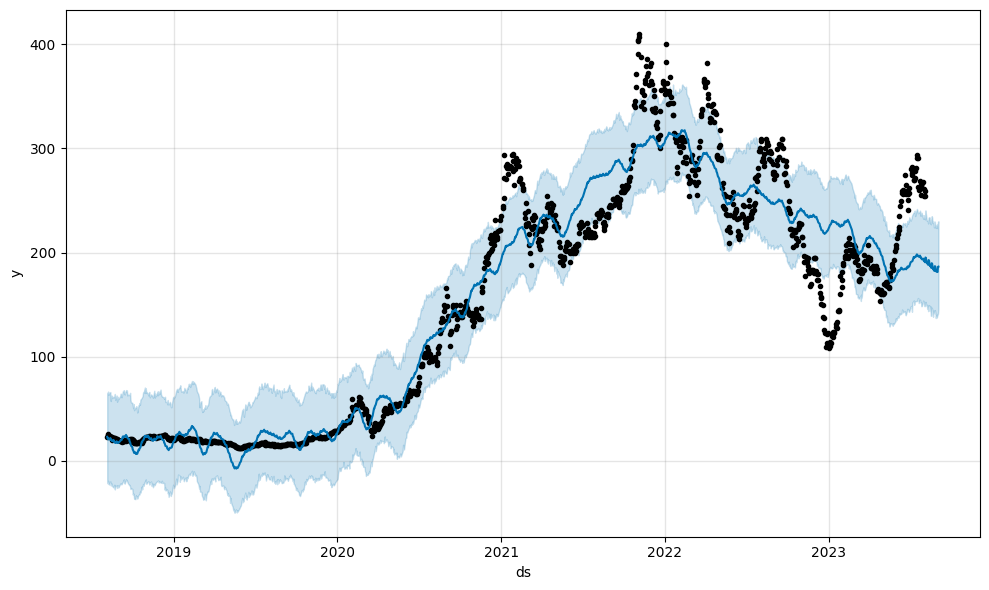

In [17]:
figure= m.plot(forecast, xlabel='ds', ylabel='y')

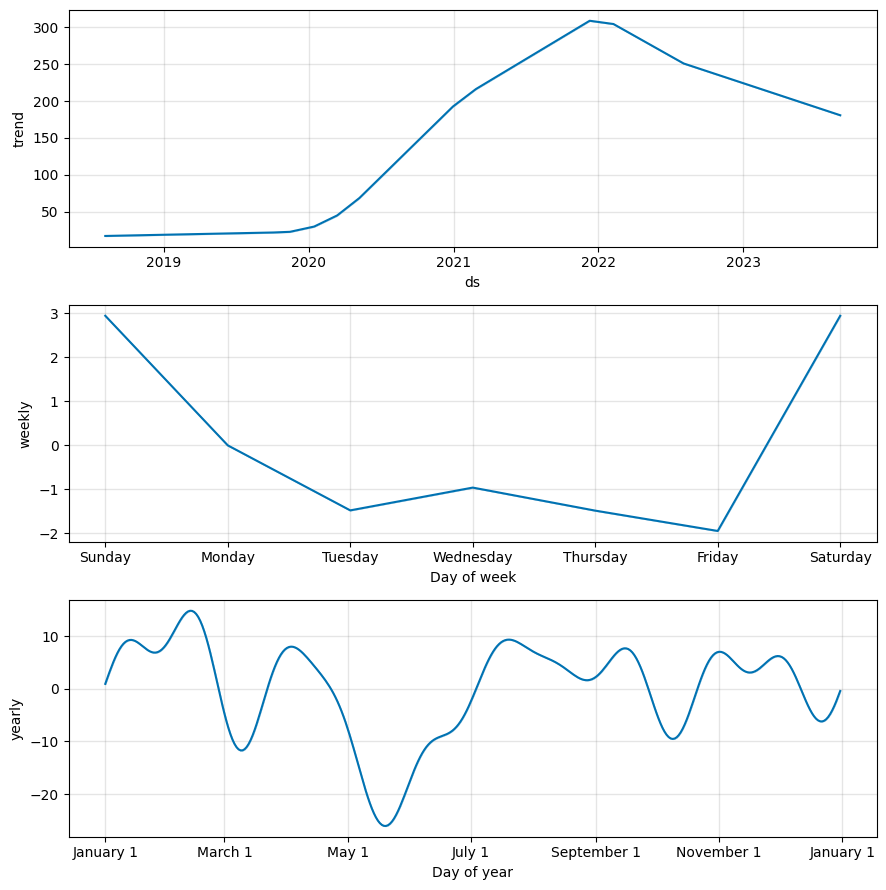

In [18]:
figure2=m.plot_components(forecast)

## Downloading the Forecast data

In [20]:
from google.colab import files
forecast.to_csv('TSLA_forecast.csv')
files.download('TSLA_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In summary, while Prophet offers an easy entry point for time series forecasting and can be a useful tool for initial explorations of stock price prediction, it has limitations when it comes to capturing the intricacies of financial markets and might not always be the best choice for sophisticated or highly accurate predictions. It's often a good idea to combine Prophet's forecasts with other techniques and domain knowledge to make more informed investment decisions.